# NYC Education

# Introduction 

"Achieving inclusive and quality education for all reaffirms the belief that education is one of the most powerful and proven vehicles for sustainable development." - [UN](https://www.undp.org/sustainable-development-goals) 

It should be the goal of any governing organization to ensure high-quality education for all, as its benefits are high and extensive. From the fact that illiteracy means you have a substantially higher likelihood of ending up in jail or on welfare, that illiteracy has a negative impact on discrimination and preventable diseases, or the fact that for every dollar spent on adult illiteracy the ROI is 6.14$ (614%). Another extremely important effect of education is the social network you get, which combats loneliness which in itself has an array of negative health impacts [[1]].  
Given that there is no doubt about the importance of education it's important to investigate when the educational system fails and people drop out ?!?Nyt ord!?!, and which factors have an impact on the dropout?!?Nyt ord!?!. To investigate this we'll look at poverty data from New York City in 2015 ?!?!?!?!?!?. 

[1]: https://www.hrsa.gov/enews/past-issues/2019/january-17/loneliness-epidemic

## The Data
The data can be obtained from [data.cityofnewyork](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2015-/ahcp-vck8).  
It contains 69103 observations and 61 columns of which we only use a subset of ?!?!?! columns:

The data is generated annually by a research unit in the Mayor's office. It is derived from the American Community Survey Public Use Microsample for NYC. 

### Exploratory Data analysis

## An investegation of the impact of education on key attributes


## Salary
An obvious attribute that we would expect education to have an impact on is income. It is intuitive that more education leads to better and more well-paid jobs, so let's investigate this claim. We'll do this by looking at the distribution of self made income (meaning no wellfare) created from the combined attributes:
* Interest, dividends, and net rental income 
* Self-employment income 
* Wages or salary income  
* Retirement income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import math
%matplotlib inline

In [2]:
data = pd.read_csv("NYCgov_Poverty_Measure_Data__2015_.csv")

# Adding column for age-group
bins= np.arange(0,110,10)
labels = ['(' + str(x)+'-'+str(x+10)+']' for x in bins[:-1]]
labels[-1] = labels[-1].replace("100]", "inf)")
data['AgeGroup'] = pd.cut(data['AGEP'], bins=bins, labels=labels, right=True)

# Create dataframe with only adults (finished school)
data_adult = data[data['AGEP'] > 24]

# Mapping of different columns 
EducAttain_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}
SEX_map = {1: 'Male', 2:'Female'}
Boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}
Off_Pov_Stat_map = {1:'In Poverty',2:'Not in Poverty'}
Ethnicity_map = {1:'Non-Hispanic White',2:'Non-Hispanic Black',3:'Non-Hispanic Asian',
    4:'Hispanic, Any Race',5:'Other Race/Ethnic Group'}


# Adding column of total income 
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

In [3]:
## Deinfe functions for finding bin size
def bins_sturges(n):
    return int(1 + np.ceil(math.log(n)))

def bins_freedamn_diaconis(data):
    q3 = np.quantile(data, 0.75)
    q1 = np.quantile(data, 0.25)
    b_w = 2*(q3-q1)/(np.cbrt(len(data)))
    if b_w == 0: 
        b_w = 1
    bins = int(np.ceil((max(data) - min(data))/b_w))
    return bins 

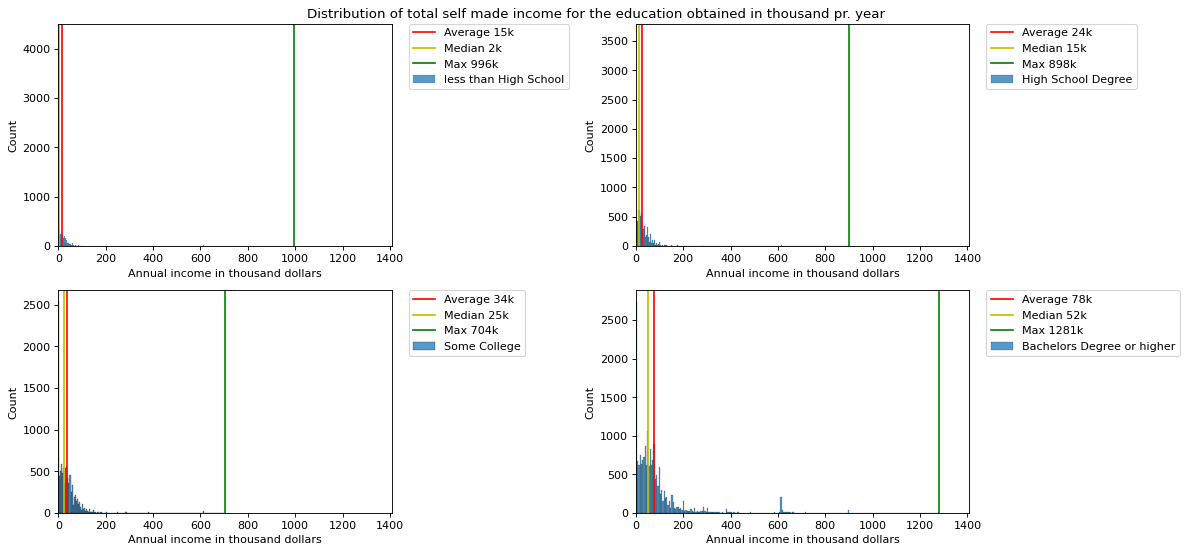

In [4]:

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['EducAttain'])): 
    data_boro = data_adult[data_adult['EducAttain'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income", bins = bins_freedamn_diaconis(data_boro['Total_income']))
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', EducAttain_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(0,data_adult['Total_income'].max()*1.10)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total self made income for the education obtained in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


Interestingly, the individual with second highest income is (the max line in $\color{green}{\text{green}}$) without a high school diploma ie. more than both people with a high scool degree and some college. What this means is just that a high salary/income can be obtained without having any education and not that you can espect a lower maximum income if you have some college education. In fact what we see is indeed that you can expect a higher salary the higher your education level. This can be seen in both the average ($\color{red}{\text{red line}}$), and median ($\color{yellow}{\text{yellow line}}$). Thus it's easy to conclude that education is an effective tool against poverty. However, it's important to note that we know nothing of the jobs that people occupy, so a higher salary does not necessarily mean a job that is a "vehicle for sustainable development". 

## Sex a hopeful story
SDG 4 says: "Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all" [[2]] this unsurprisingly also includes women. Worldwide we know there is a discrepancy between males and females from Hans Rosling's quiz in the opening of his famous book Factfullness: "Worldwide, 30-year-old men have spent 10 years in school, on average. How many years have women of the same age spent in school?" the answer is 9 years [[3]]. This number is of course or US or NYC specific, thus let's take a look: 

[2]: https://sdgs.un.org/goals/goal4
[3]: https://factfulnessquiz.com

It's fairly clear that there is no difference in education obtained between the sexes, however, let's also see if this holds true by race:
### Race and Sex


### Salary and Sex a sad story
Although the equality of education between the sexes is a good sign, it's an entirely different and alarming story when looking at sex and salary: 


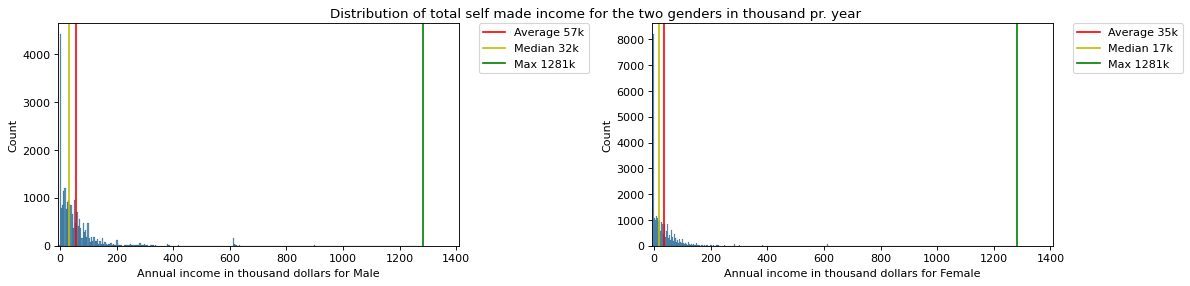

In [5]:
data_adult = data[data['AGEP'] > 24]
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

#data_above = data_adult[data_adult['Total_income'] != 0]

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['SEX'])): 
    #data_boro = data_adult[data_adult['SEX'] == dist]
    data_boro = data_adult[data_adult['SEX'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income", bins = bins_freedamn_diaconis(data_boro['Total_income']))
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(data_adult['Total_income'].min(),data_adult['Total_income'].max()*1.10)
    plt.xlabel('Annual income in thousand dollars for ' + SEX_map[dist])
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total self made income for the two genders in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


Here we have a fairly big discrepancy as both the $\color{red}{\text{average}}$ and $\color{yellow}{\text{median}}$ is significantly higher for males (about 70%). This is very alarming as it contradicts our previous conclusion: that higher education means a higher salary and thus an effective tool against poverty. The two figures above suggest that although females have an equal amount of education as men, they still have a lower average salary, and thus a higher likelihood of being in poverty. Now you might think that this low salary could be explained by "Stay-at-home-momes" but there is a difference in salary between men and women even when removing instances of people not earning any money:

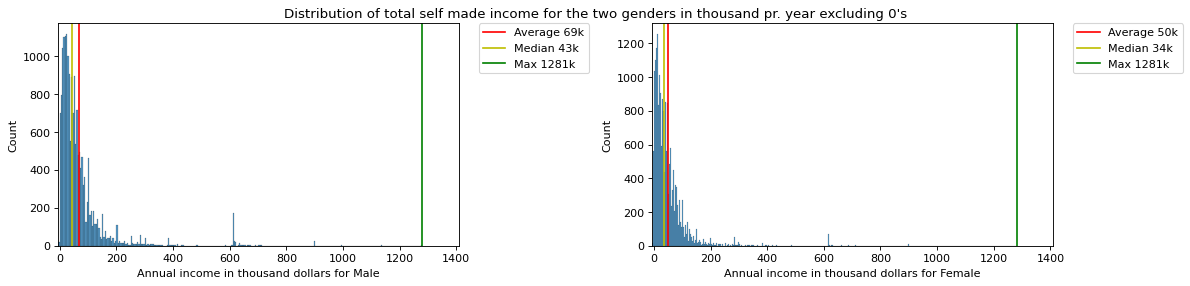

In [6]:
data_adult = data[data['AGEP'] > 24]
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

data_above = data_adult[data_adult['Total_income'] != 0]

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['SEX'])): 
    #data_boro = data_adult[data_adult['SEX'] == dist]
    data_boro = data_above[data_above['SEX'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income", bins = bins_freedamn_diaconis(data_boro['Total_income']))
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(data_adult['Total_income'].min(),data_adult['Total_income'].max()*1.10)
    plt.xlabel('Annual income in thousand dollars for ' + SEX_map[dist])
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total self made income for the two genders in thousand pr. year excluding 0\'s')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

The difference is still significant (about 35%). And even if the the entire difference could be explained by stay-at-home-momes, there is still a question if it should be the case, as this is gender inequality no matter if it is voluntary or not.

### Ethnicity and age
NYC is a multicultural city with people coming from all ethnicities, does all of them get the same opportunities for educations?

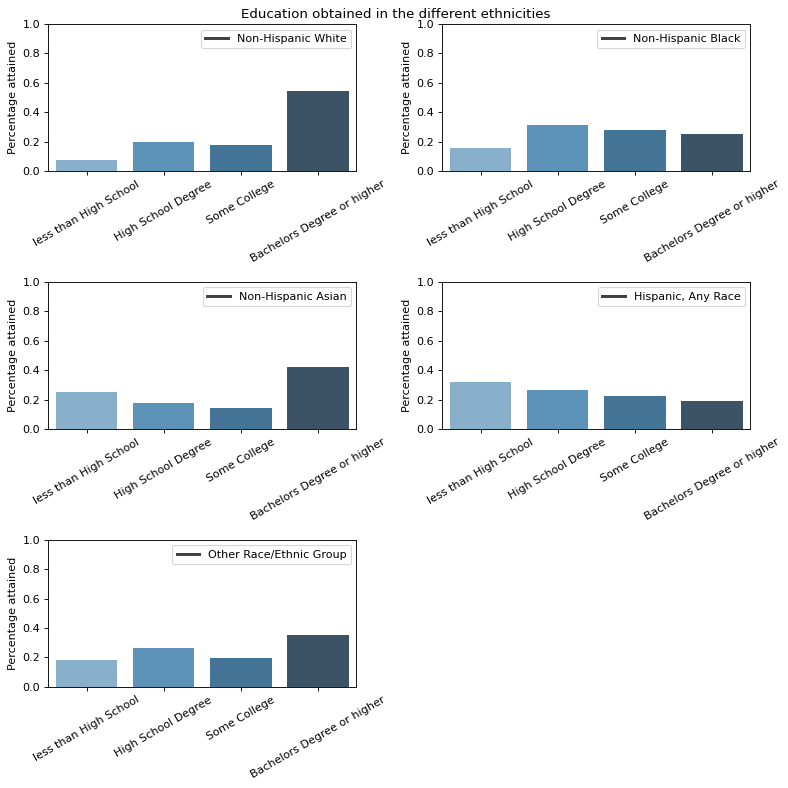

In [7]:

df_city_health = pd.DataFrame(data_adult.groupby(['EducAttain','Ethnicity'])['SERIALNO'].count()).reset_index()
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
df_city_health['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'],inplace=True)
for eth in list(Ethnicity_map.keys()): 
    df_city_health.loc[(df_city_health['Ethnicity'] == eth) , 'Count'] = df_city_health.loc[(df_city_health['Ethnicity'] == eth)  , 'Count']/(sum(df_city_health.loc[df_city_health['Ethnicity'] == eth, 'Count']))

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Ethnicity'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'EducAttain', y = 'Count', data = df_city_health[df_city_health.Ethnicity == dist],palette="Blues_d")
    #plt.legend(labels=[Education_map[dist],'Male', 'Female'])
    plt.xlabel('')
    plt.ylabel('Percentage attained')
    plt.legend(labels=[Ethnicity_map[dist]])
    plt.ylim(0, 1)
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Education obtained in the different ethnicities')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

We do see that for white, Asian, and other over 50% have a higher education, whereas majority of the Hispanic in our dataset have less than high school education which is beneath [SDG 4.1](https://sdgs.un.org/goals/goal4). But could this be a historical issue and no longer be the case? Looking at the general education we would expect it to be higher the lower the age (age > 24), since the focus on education and resource helping people to get an education has changed dramatically. Additionally, the American society is generally less segregated, especially compared to say the 60s, thus we would expect to see a greater increase in education for all other races.

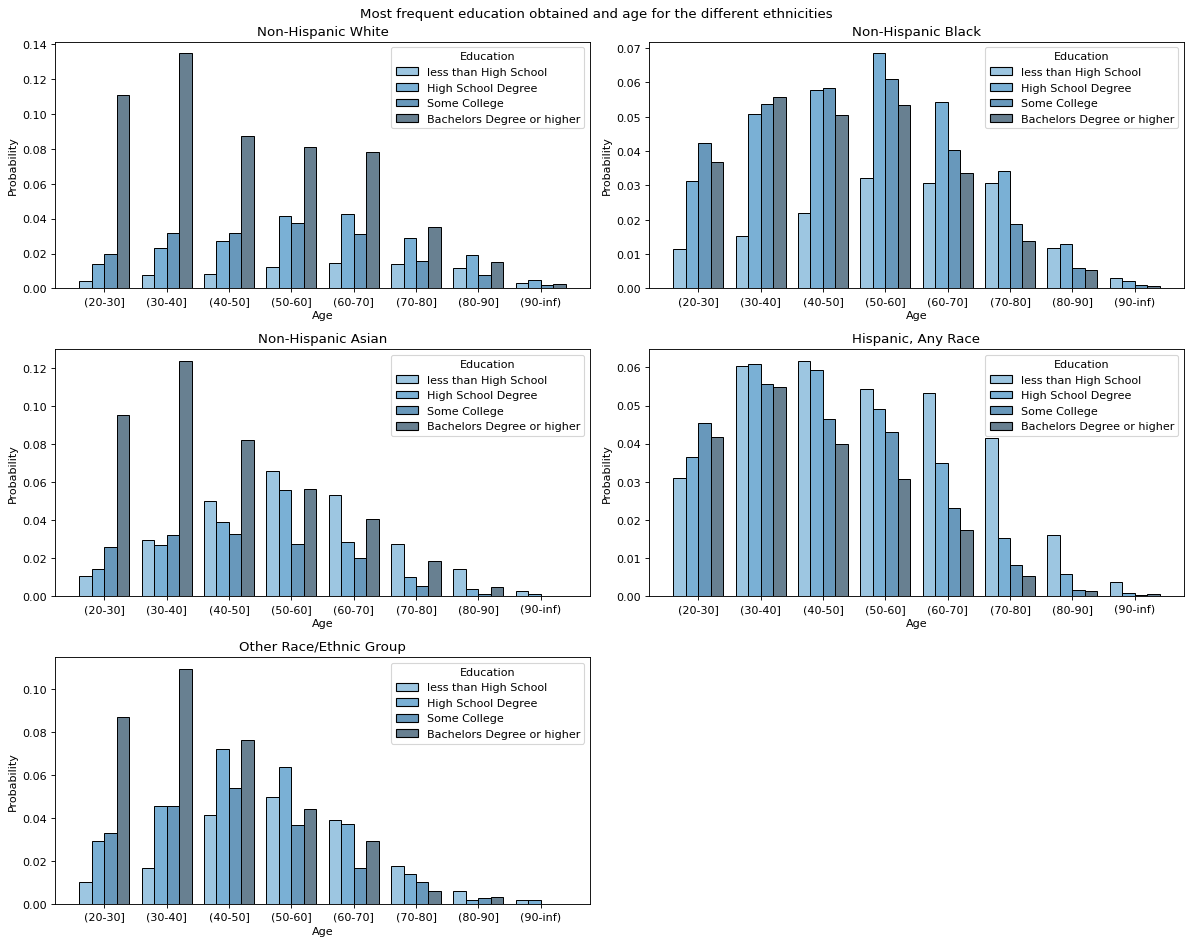

In [8]:
### AGE, ethicicity and education 
hue_order_edu = list(EducAttain_map.values())
figure(figsize=(15, 12), dpi=80)
i = 1
for eth in list(Ethnicity_map.keys()):
    plt.subplot(3, 2, i)
    data_temp =  data_adult[data_adult['Ethnicity'] == eth]
    #data_temp['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'],inplace=True)
    temp_col = data_temp['EducAttain'].map(EducAttain_map)
    data_temp.insert(1, "Education", temp_col, True)
    #age_edu = {}
    #for age in list(set(data_temp['AGEP'])):
    #    age_edu[age] = data_temp.loc[data_temp['AGEP']==age,'EducAttain'].mode()
    
    ax = sns.histplot(x = 'AgeGroup',hue = 'Education', data = pd.DataFrame(data_temp), multiple="dodge", shrink=.8,palette="Blues_d", stat='probability',
        hue_order=hue_order_edu)
    plt.title(Ethnicity_map[eth])
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #      ncol=3, fancybox=True, shadow=True,labels=[Ethnicity_map[eth]])
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    #      fancybox=True, shadow=True, ncol=5, labels=[Ethnicity_map[eth]])
    plt.xlabel('Age')
    #plt.ylabel('Education')
    #plt.ylim(0,5)
    i += 1
plt.suptitle('Most frequent education obtained and age for the different ethnicities')
plt.tight_layout()
plt.show()

The Hispanic race seems to be having the most trouble with obtaining an education even for the younger generation of 25-35 where there are still some where high school education is the most frequent. This may be troublesome for many increasing importance of a college degree steady increasing [[5]](https://www.ncbi.nlm.nih.gov/books/NBK19909/#:~:text=Despite%20high%20educational%20expectations%2C%20Hispanics,(U.S.%20Census%20Bureau%2C%202003)). But alike our theory the younger generation is having a higher education which is a result of the increase focus in education.

## Borough

New York City is divied into five different bourgh each with it's own flavor [[11]](https://www.britannica.com/place/New-York-City/The-boroughs):  
**Bronx** one of the most prominent centres of urban poverty in the United States.
**Brooklyn** Collision of old and new   
**Manhattan** center of NYC and the representative of NYC with central Park, Broadway show and Times Square  
**Queens** primiary middel-class families and the most ethnically varied of all the boroughs  
**Staten Island** The most rural part of the city  


# Creating a predictive model that should be bad a predictor (but isn't)

iashafhafohasfoih we'll look at predicting the attained education level given attributes that shouldn't really have an impact on education level. These attributes are: **Age**, **Borough** (location), **Disability**, **languages other than English spoken**, **number of people in the household**, **Race**, **Sex**.   
Interestingly we would expect **languages other than English spoken** to have a negative impact on the level of education attained, as the majority of Americans only speak English, thus speaking another language than English is an indication the person is of another race. Of course, attributes like **Race** and **Sex** having an influence on education would go directly against SDGs 4, and 5. 
Finally, looking at the heat maps !?!??!!? we see that there are concentrations of ?!?!?!?! ?in =!=!=!=!=!, thus **Borough** having an impact on education, is another way of saying **Race** has an impact. Additionally, we know that a community (**Borough**) has a positive feedback loop in either direction, so higher education leads to even higher education and vice versa !)!))")#=)!"=)#="! see heat map !="?!"?#=!"?€=!"€=€!"?=€!"€?=. 